# Logistic Regression

In logistic regression, we want to predict the value of a random variable $y$ that can take values of 0 or 1 with propability $p$ that $y=1$ and probability $1-p$ that $y=0$.

The logistic model has the form $p = \frac{\exp(a^Tu+b)}{1+\exp(a^Tu+b)}$ and gives the probabilty that $y=1$ given an input $u$ and parameters $a$ and $b$.

Suppose we are given some data $u_1, ..., u_m \in \mathbb{R}^n$ which we have arranged such that for $u_1 ... u_q$, $y=1$, and for $u_{q+1} ... u_m$, $y=0$. We want to minimize the convex function $L(a,b) = -\sum_{i=1}^q \log(p_i) - \sum_{i=q+1}^m \log(1-p_i)$, where each $p_i$ is given by the result of the logistic model on $u_i$. This function is equivalent to $$L(a,b) = -\sum_{i=1}^q (a^Tu_i + b) + \sum_{i=1}^m \log(1+\exp(a^Tu_i + b))$$

## Example

In this example, we will show how to fit a regression model on a dataset using CVXPY.

First, we import all the packages we will need.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

/Users/Abraham/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Next, we generate to fit our logistic regression model to. For this example, we generate random data for our output and set our output to be 1 or 0 based on if the input is positive or negative with some noise. Note: in this example, the input is one-dimensional, and for higher dimensional data this will not be a good method of separating data into two groups.

In [33]:
def generate_data(m = 100, n=1, max_dom=1, min_dom=-1, noise=.3):
    X = np.random.normal(0, max_dom, size=(m,n))
    Y = (X > 0).astype(np.float)
    
    X += noise * np.random.normal(size=(m,n))
    
    c = np.column_stack((X,Y))
    c = c[c[:,n].argsort()]
    X = c[:,:n]
    X = np.reshape(X, (m,n))
    Y = c[:,1]
    
    q = np.where(Y[:-1] != Y[1:])[0][0] + 1
    return X, Y, q

    
m = 100
n = 1

max_dom = 5.
min_dom = -5.
noise = 1

X,Y,q = generate_data(m, n, max_dom, min_dom, noise)

Next, we set up our CVXPY problem and solve it. We then graph our raw data points along with the regression model that was generated to fit the data.

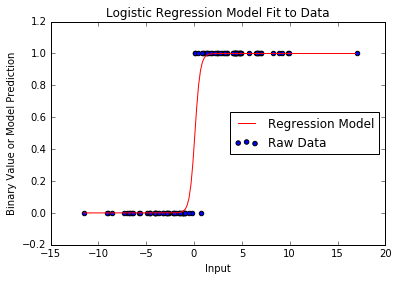

In [40]:
a = cp.Variable(n)
b = cp.Variable()

cost = -cp.sum(X[q:]*a + b) + cp.sum(cp.logistic(X*a + b))

problem = cp.Problem(cp.Minimize(cost))

problem.solve()


a_val = a.value[0]
b_val = b.value

t = np.arange(X.min(), X.max(), 0.2)
plt.plot(t, np.exp(a_val*t+b_val)/(1+np.exp(a_val*t+b_val)), color = 'red', label = "Regression Model")
plt.scatter(X,Y, label = "Raw Data")
plt.legend(loc="center right")
plt.xlabel("Input")
plt.ylabel("Binary Value or Model Prediction")
plt.title("Logistic Regression Model Fit to Data")
plt.show()